<a href="https://colab.research.google.com/github/JaviARo/EP-1-2-3/blob/main/JavierAlemanRodriguez_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Javier Alemán Rodríguez

Dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

## Instalación de librerías

In [1]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


### Importación de librerías

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
import sklearn.externals
import joblib
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from pyngrok import ngrok

### Importación del dataset

In [3]:
sleep_health = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_health = sleep_health.dropna(axis=1)
sleep_health

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Separación entre valores de entrada y salida, conversión de variables categóricas en numéricas y separación de datos de entrenamiento y test

In [4]:
X = sleep_health.drop(columns=["Person ID", "Occupation", "Quality of Sleep"], axis=1)

X = X.assign(
    Blood_Pressure_Systolic = lambda x: x['Blood Pressure'].apply(lambda y: int(y[:y.find('/')])),
    Blood_Pressure_Diastolic = lambda x: x['Blood Pressure'].apply(lambda y: int(y[y.find('/') + 1:]))
)

X = X.drop(["Blood Pressure"], axis=1)

X['BMI Category'].replace(['Normal', 'Normal Weight', 'Overweight', 'Obese'],[0, 0, 1, 2], inplace=True)
X['Sleep Disorder'].replace(['None', 'Sleep Apnea', 'Insomnia'],[0, 1, 2], inplace=True)
X['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
y = sleep_health["Quality of Sleep"]

In [5]:
X = X.drop(columns=["Daily Steps", "Blood_Pressure_Diastolic"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### KNN

Min Value uniform : 0.0805084745762712 (1)
Min Value distance : 0.07627118644067797 (4)


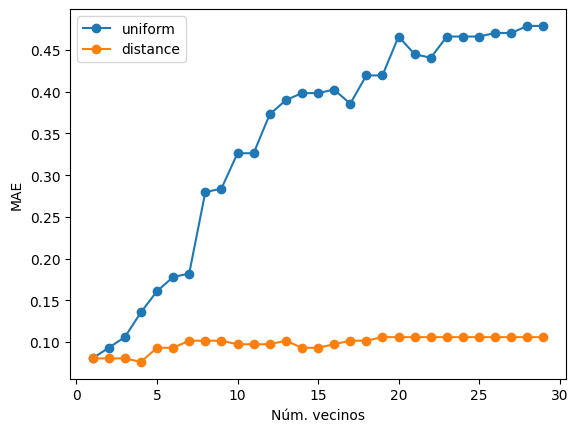

In [6]:
cv = TimeSeriesSplit(n_splits = 4) #

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for k in range(1,30):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights)
    # Utilizar cross_val_score para obtener los scores de validación cruzada
    scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    mean_mae = -np.mean(scores)  # Negar el MAE para convertirlo a positivo

    total_scores.append(mean_mae)

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")

plt.ylabel('MAE')
plt.xlabel('Núm. vecinos')
plt.legend()
plt.show()

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4, weights="distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_val = cross_val_score(knn, X, y, cv=4).mean()
print("Número de vecinos: 4 - Precisión: %.2f" % (acc_val))

Número de vecinos: 4 - Precisión: 0.91


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


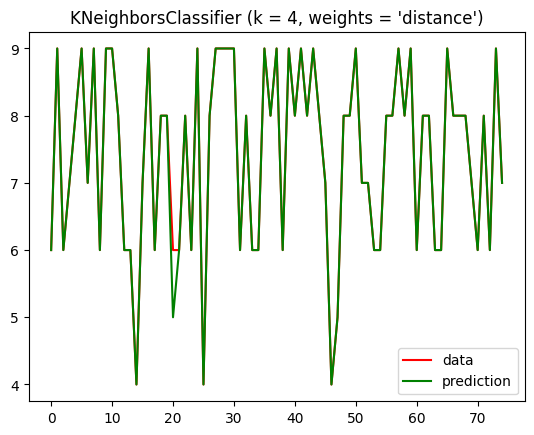

In [8]:
xx = np.stack(i for i in range(y_test.shape[0])) # y_test
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsClassifier (k = %i, weights = '%s')" % (4, "distance"))

plt.show()

### Árboles de decisión

In [9]:
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth = i, random_state = 1)

  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  score = tree.score(X_test, y_test)
  print("Profundidad del árbol: %i - Precisión: %f" % (i, score))

Profundidad del árbol: 1 - Precisión: 0.546667
Profundidad del árbol: 2 - Precisión: 0.826667
Profundidad del árbol: 3 - Precisión: 0.866667
Profundidad del árbol: 4 - Precisión: 0.973333
Profundidad del árbol: 5 - Precisión: 0.986667
Profundidad del árbol: 6 - Precisión: 0.986667
Profundidad del árbol: 7 - Precisión: 0.986667
Profundidad del árbol: 8 - Precisión: 0.986667
Profundidad del árbol: 9 - Precisión: 0.986667
Profundidad del árbol: 10 - Precisión: 0.986667
Profundidad del árbol: 11 - Precisión: 0.986667
Profundidad del árbol: 12 - Precisión: 0.986667
Profundidad del árbol: 13 - Precisión: 0.986667
Profundidad del árbol: 14 - Precisión: 0.986667
Profundidad del árbol: 15 - Precisión: 0.986667
Profundidad del árbol: 16 - Precisión: 0.986667
Profundidad del árbol: 17 - Precisión: 0.986667
Profundidad del árbol: 18 - Precisión: 0.986667
Profundidad del árbol: 19 - Precisión: 0.986667


### Modelo seleccionado

In [10]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 1)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
score = tree.score(X_test, y_test)
print("Profundidad del árbol: %i - Precisión: %f" % (5, score))

Profundidad del árbol: 5 - Precisión: 0.986667


### Exportación del modelo

In [11]:
joblib.dump(tree,'modelo_de_arbol.pkl')

['modelo_de_arbol.pkl']

### Importación del modelo

In [12]:
tree_entrenado = joblib.load('modelo_de_arbol.pkl')
tree_entrenado.score(X_test, y_test) # Obtenemos la precisión

0.9866666666666667

### Creación de script a leer por Streamlit

In [13]:
y_test.to_pickle('y_test.pkl')
np.save('y_pred.npy', y_pred)

In [14]:
%%writefile arbol.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

st.title("Modelo de árbol de decisión")
st.write("Dataset de calidad de sueño")

y_test = pd.read_pickle('y_test.pkl')
y_pred = np.load('y_pred.npy')

xx = np.stack(i for i in range(y_test.shape[0])) # y_test
fig, ax = plt.subplots()
ax.plot(xx, y_test, c='r', label='data')
ax.plot(xx, y_pred, c='g', label='prediction')
ax.set_xlabel('Índice')
ax.set_ylabel('Valor')
ax.set_title("DecisionTreeClassifier")
ax.legend()

st.pyplot(fig)

Writing arbol.py


In [15]:
!wget -q -O - ipv4.icanhazip.com

34.75.23.76


In [16]:
!streamlit run arbol.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.23.76:8501

npx: installed 22 in 4.771s
your url is: https://empty-meals-know.loca.lt
/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py:287: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self._run_script(request.rerun_data)
  Stopping...
^C
